# Carregando o corpus

In [1]:
import json

books = json.load(open("scrap-skoob/output/reviewsSkoob.json"))

# Extraindo métricas descritivas básicas

In [2]:
total_books = len(books)
total_books

81724

In [3]:
total_reviews = sum([len(book['reviews']) for book in books])
total_reviews

640644

In [4]:
import itertools

reviews = list(itertools.chain.from_iterable([review for review in [book['reviews'] for book in books]]))
review_authors = set([review['user_id'] for review in reviews])

len(review_authors)

108882

# Calculando proporção de notas das resenhas

In [34]:
import pandas as pd

df_reviews = pd.DataFrame(reviews)

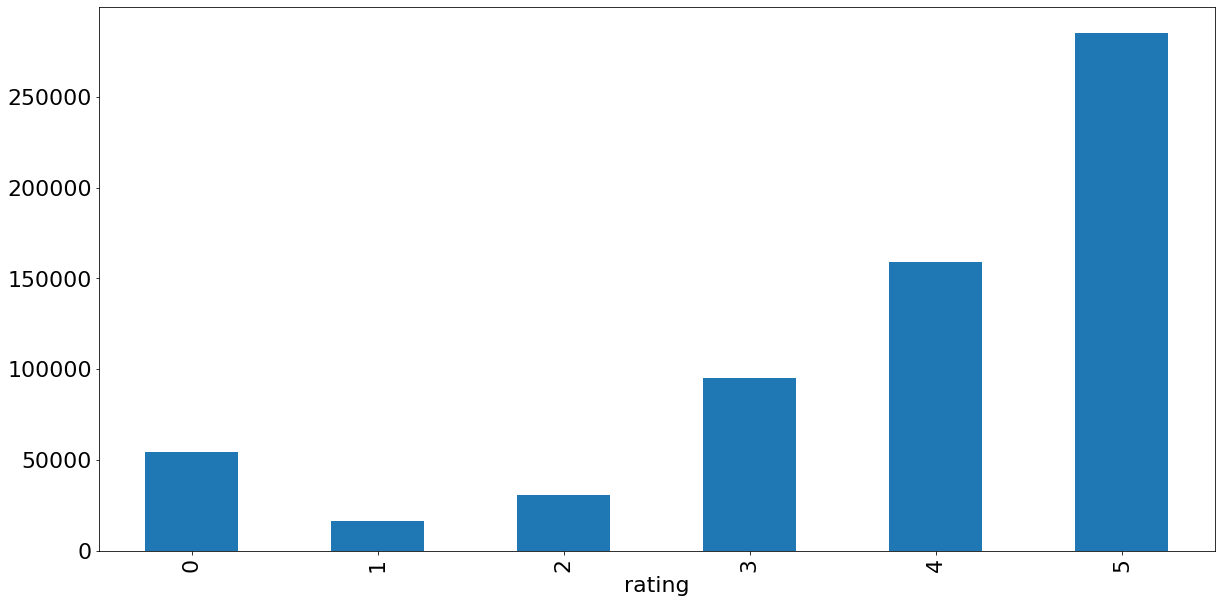

In [35]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,10))
df_reviews.groupby(['rating']).count()['user_id'].plot.bar()

In [7]:
reviews_by_rating = df_reviews.groupby(['rating']).count()['user_id']
reviews_by_rating  / reviews_by_rating.sum()

rating
0    0.084871
1    0.025349
2    0.047981
3    0.148195
4    0.248350
5    0.445254
Name: user_id, dtype: float64

# Descobrindo os livros mais populares

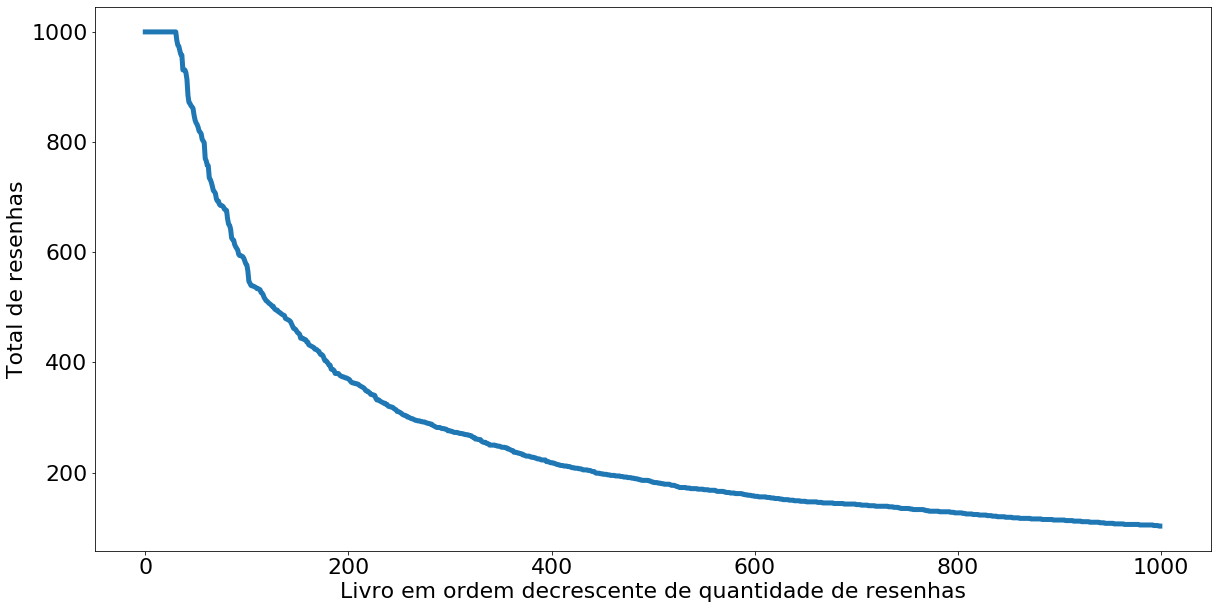

In [8]:
import numpy as np

df_reviews_by_book = pd.DataFrame([(len(book['reviews']), book['book_name']) for book in books], columns=['qtd_reviews', 'livro'])
df_reviews_by_book.sort_values(by=['qtd_reviews'], ascending=False)['qtd_reviews'].values

first_books = df_reviews_by_book.sort_values(by=['qtd_reviews'], ascending=False)['qtd_reviews'].values[:1000]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.plot(np.arange(1000), first_books, linewidth=5)
plt.xlabel('Livro em ordem decrescente de quantidade de resenhas')
plt.ylabel('Total de resenhas')
plt.show()

# Calculandoi o tamahno das resenhas

In [9]:
import nltk    
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df_reciews_tokenized = df_reviews['text'].apply(lambda x: tokenizer.tokenize(x))

In [37]:
review_lens = [len(review) + 1 for review in df_reciews_tokenized]
sum(review_lens) - len(review_lens)

139678539

(array([4.5800e+02, 0.0000e+00, 0.0000e+00, 1.8050e+03, 0.0000e+00,
        2.3910e+03, 0.0000e+00, 2.1490e+03, 2.3300e+03, 2.5370e+03,
        2.6870e+03, 5.6370e+03, 6.1680e+03, 6.3880e+03, 1.0330e+04,
        1.0721e+04, 1.7486e+04, 1.6897e+04, 2.0596e+04, 2.3185e+04,
        2.4892e+04, 3.1547e+04, 3.3259e+04, 3.3092e+04, 3.3984e+04,
        3.6583e+04, 3.3946e+04, 3.5560e+04, 3.3748e+04, 3.3113e+04,
        3.4301e+04, 3.3855e+04, 3.1206e+04, 2.7121e+04, 2.1456e+04,
        1.4333e+04, 8.3200e+03, 4.2650e+03, 2.1500e+03, 9.7700e+02,
        4.9400e+02, 2.6700e+02, 1.7100e+02, 1.0300e+02, 5.2000e+01,
        2.9000e+01, 2.7000e+01, 1.0000e+01, 1.1000e+01, 7.0000e+00]),
 array([0.        , 0.08130935, 0.16261871, 0.24392806, 0.32523741,
        0.40654677, 0.48785612, 0.56916547, 0.65047483, 0.73178418,
        0.81309353, 0.89440289, 0.97571224, 1.05702159, 1.13833095,
        1.2196403 , 1.30094966, 1.38225901, 1.46356836, 1.54487772,
        1.62618707, 1.70749642, 1.78880578, 1.

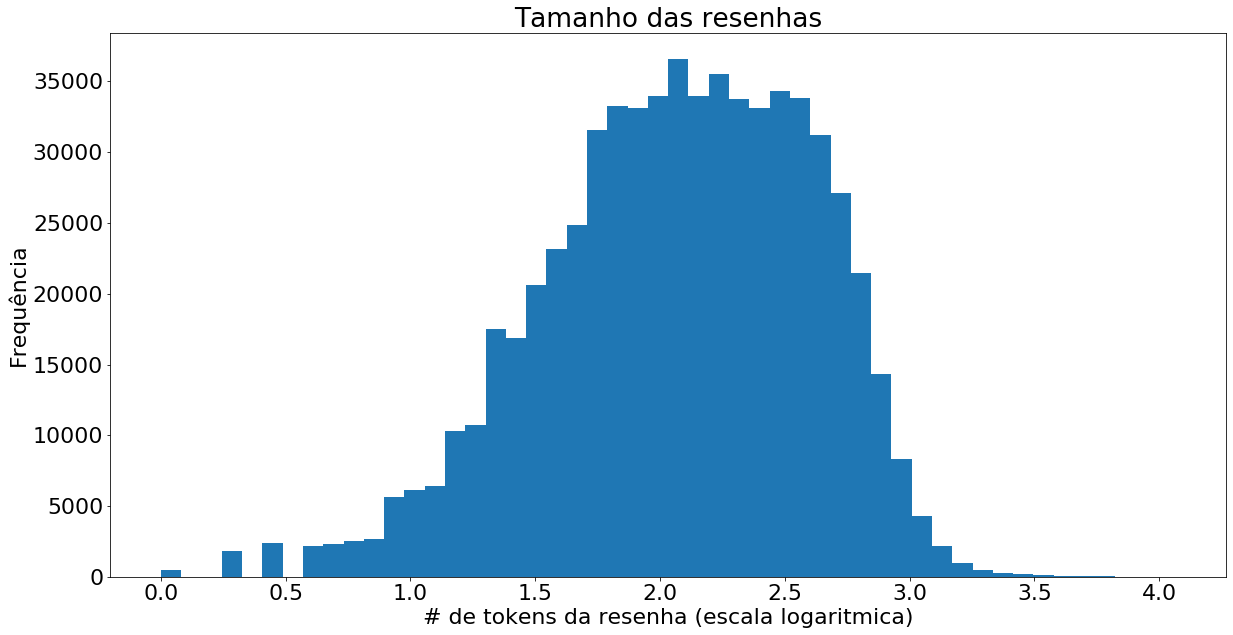

In [23]:
import scipy.stats as stats
import numpy as np
import matplotlib.mlab as mlab

plt.figure(figsize=(20,10))
plt.title("Tamanho das resenhas")
plt.xlabel("# de tokens da resenha (escala logaritmica)")
plt.ylabel("Frequência")
plt.hist(np.log10(review_lens), bins=50)

mu, sigma = np.mean(np.log10(review_lens)), np.std(np.log10(review_lens))

In [24]:
mu, sigma = np.mean(np.log10(review_lens)), np.std(np.log10(review_lens))
mu, sigma

(2.0670418001598856, 0.5375101395270724)